In [287]:
#import Library dan package yang dibutuhkan 
import numpy as np #untuk perhitungan saintifik 
import matplotlib.pyplot as plt #untuk plotting 
from sklearn.linear_model import LinearRegression #import Library LinearRegression dari scikit-Learn

In [299]:
#buat data 
penjualan=np.array([6,5,5,4,4,3,2,2,2,1]) 
harga=np.array([16000, 18000, 27000, 34000, 50000, 68000, 65000, 81000, 85000, 90000])

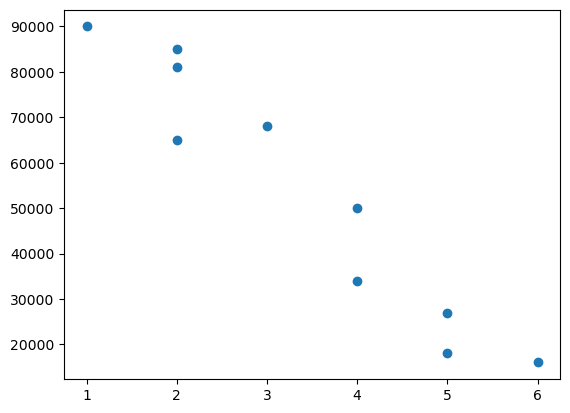

In [301]:
#buat plot 
%matplotlib inline 
plt.scatter(penjualan, harga)

In [309]:
#buat permodelan regresi 
penjualan = penjualan.reshape (-1,1)
linreg = LinearRegression() 
linreg.fit(penjualan, harga)

LinearRegression()

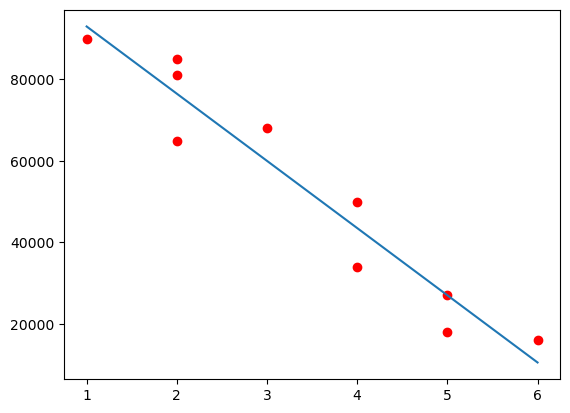

In [311]:
#plot hasil regresi 
plt.scatter(penjualan, harga, color='red') 
plt.plot(penjualan, linreg.predict(penjualan))

In [319]:
df= pd.read_csv("FuelConsumptionCo2.csv") #membaca data 
#melihat 5 baris pertama data 
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [329]:
cdf = df [['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']] 
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


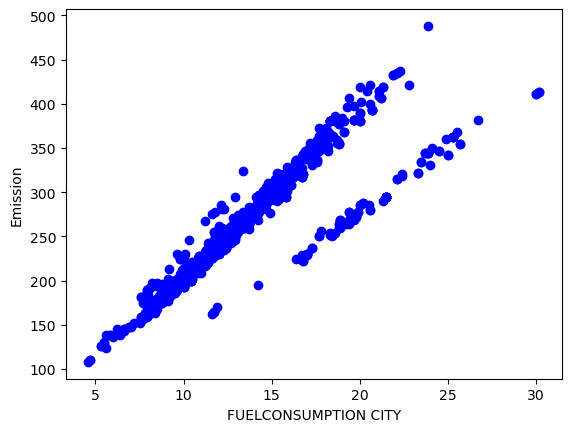

In [339]:
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION CITY") 
plt.ylabel("Emission") 
plt.show()

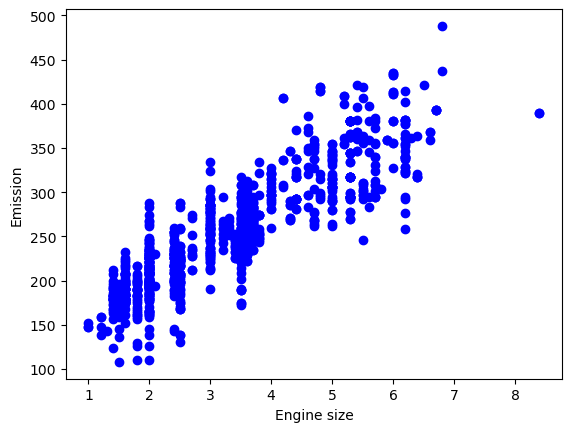

In [341]:
plt.scatter(cdf. ENGINESIZE, cdf.CO2EMISSIONS, color="blue") 
plt.xlabel("Engine size") 
plt.ylabel("Emission") 
plt.show()

In [355]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

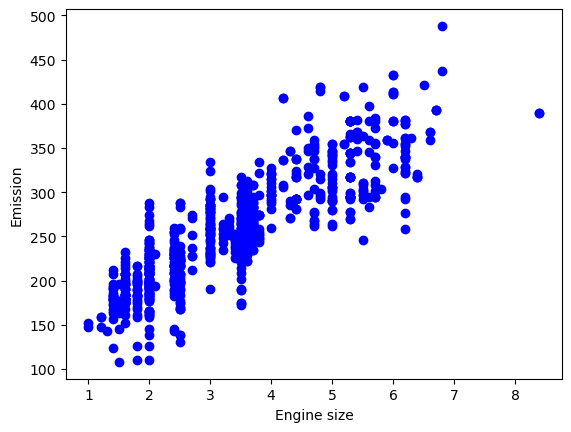

In [357]:
plt.scatter(train. ENGINESIZE, train.CO2EMISSIONS, color="blue") 
plt.xlabel("Engine size") 
plt.ylabel("Emission") 
plt.show()

In [363]:
#MODEL REGRESI
regr = LinearRegression()
train_x = np.asanyarray (train[['ENGINESIZE']]) 
train_y = np.asanyarray (train[['CO2EMISSIONS']]) 
regr.fit (train_x, train_y) 
#Koefisien model
print ('Coefficients:', regr.coef_) 
print ('Intercept: ',regr.intercept_)

Coefficients: [[38.4553956]]
Intercept:  [127.05608742]


Text(0, 0.5, 'Emission')

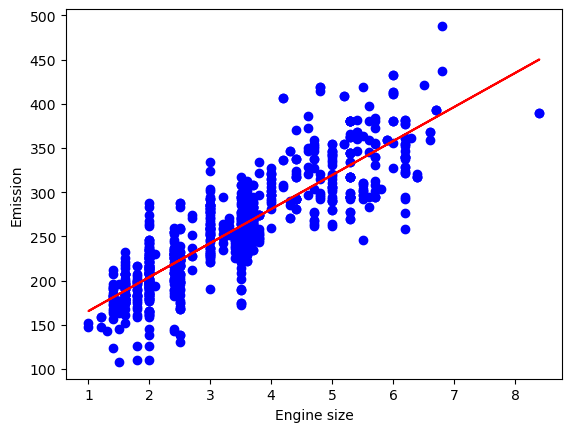

In [365]:
#PLOT HASIL REGRESI
plt.scatter(train. ENGINESIZE, train.CO2EMISSIONS, color='blue') 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') 
plt.xlabel("Engine size") 
plt.ylabel("Emission")

In [381]:
#Menghitung error 
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']]) 
test_y = np.asanyarray(test[['CO2EMISSIONS']]) 
test_y = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - test_y) ** 2)) 
print("R2-score: %.2f" % r2_score(test_y, test_y))

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00
